## Linear Regression Implementation

In this notebook, we will implement a single neuron linear regression model. Unlike the perceptron, this model will attempt to predict a continuous target. The model will find the best line of fit between a dependent and independent variable. 

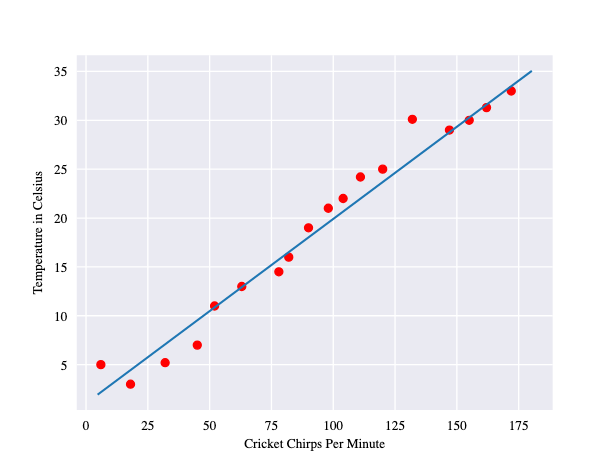

We will also utilize stochastic gradient descent to minimize the cost function of linear regression. 

The cost function of choice is the mean-squared error cost:
        
$\qquad$ $C(w,b) = \frac{1}{2N} \sum_{i=1}^{N} (\hat{y}^i - y^i)^2$
         

### Class Implementation

We can begin by implementing our regression model in a Python class. 

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

class SingleNeuron:
    """
    Represents a single artificial neuron.

    Attributes
    ----------
    activation_function : callable
    The function applied to the neuron's output (pre-activation).
    Example: sigmoid, tanh, relu, etc.

    cost_function : callable
    The loss function used to measure model performance during training.
    Example: mean squared error, cross entropy, etc.

    w_ : numpy.ndarray
    Weights vector for the neuron, with the last entry being the bias.

    errors_ : list of float
    Mean squared error for each epoch during training.

    Methods
    -------
    train(X, y, alpha=0.005, epochs=50) -> "SingleNeuron":
    Trains the neuron using stochastic gradient descent.

    predict(X: numpy.ndarray) -> numpy.ndarray:
    Predicts the output using the trained neuron.

    plot_cost_function():
    Plots the cost function across epochs.

    plot_decision_boundary(X, y, xstring="x", ystring="y"):
    Plots the decision boundary if the neuron is used for binary classification.
    """

    def __init__(self, activation_function: callable, cost_function: callable):
        self.activation_function = activation_function
        self.cost_function = cost_function
        self.w_ = None
        self.errors_ = []
        

    def train(self, X: np.ndarray, y: np.ndarray, alpha: float = 0.005, epochs: int = 50) -> "SingleNeuron":
        """
        Trains the neuron on the provided data.

        Parameters
        ----------
        X : numpy.ndarray
        The feature matrix with shape (number_samples, number_features).

        y : numpy.ndarray
        The target vector with shape (number_samples,).

        alpha : float, optional
        The learning rate. Default is 0.005.

        epochs : int, optional
        Number of times the entire dataset is shown to the model. Default is 50.

        Returns
        -------
        SingleNeuron
        The trained neuron.
        """
        self.w_ = np.random.randn(1 + X.shape[1])
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = alpha * (self.predict(xi) - target)
                self.w_[:-1] -= update * xi
                self.w_[-1] -= update
            errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors / N)
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predicts the output for the given input data.

        Parameters
        ----------
        X : numpy.ndarray
        The feature matrix to predict on.

        Returns
        -------
        numpy.ndarray
        Predictions for the input samples.
        """
        z = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(z)

    def plot_cost_function(self):
        """Plots the cost across epochs."""
        fig, axs = plt.subplots(figsize=(10, 8))
        axs.plot(range(1, len(self.errors_) + 1), self.errors_, label="Cost function")
        axs.set_xlabel("Epochs", fontsize=15)
        axs.set_ylabel("Cost", fontsize=15)
        axs.legend(fontsize=15)
        axs.set_title("Cost Across Epochs During Training", fontsize=18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        """
        Plots the decision boundary for 2D data.

        Parameters
        ----------
        X : numpy.ndarray
        The feature matrix.

        y : numpy.ndarray
        The target vector.

        xstring : str, optional
        Label for the x-axis. Default is "x".

        ystring : str, optional
        Label for the y-axis. Default is "y".
        """

        plt.figure(figsize=(10, 6))
        plot_decision_regions(X, y, clf=self)
        plt.title("Neuron Decision Boundary", fontsize=18)
        plt.xlabel(xstring, fontsize=15)
        plt.ylabel(ystring, fontsize=15)
        plt.legend(loc='upper left')
        plt.show()

We also need to define activation functions. Since we are doing linear regression in this notebook, we will define a linear activation function. Otherwise, we could define a sigmoid activation for logistic regression. 

In [155]:
def linear_regression_activation(z):
    '''
    Linear Regression activation function
    
    Parameters:
    -----------
    z : float --> input to activation function
    
    Returns:
    --------
    float: same as input
    '''
    
    return z

def mean_sqaured_error(y_hat, y):
    '''
    Mean Squared Error cost function
    
    Parameters:
    -----------
    y_hat : float
    y : float
    
    Returns:
    --------
    
    float: cost
    
    '''
    return .5*(y_hat - y)**2

## Application on Auto-MPG Dataset

Given that we implemented our linear regresison model, we can now apply it on a dataset and analyze the results. The dataset we will be using is the Auto-MPG dataset from the UCI Machine Learning Repository. I am a big fan of cars, so this dataset looked very interesting. 

For simplicity, we will only try to predict mpg using one feature, horsepower. 

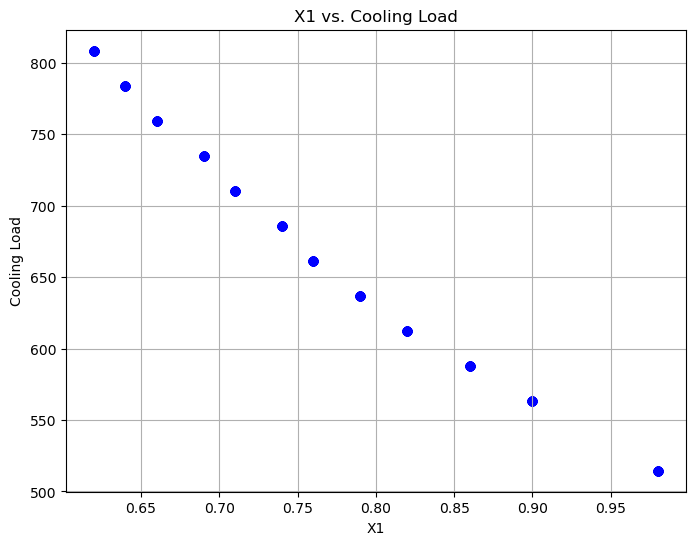

In [156]:
import pandas as pd

energy = pd.read_csv("/Users/kritinshanmugam/Downloads/energy.csv")
    
X = energy.drop(['Y1', 'Y2'], axis=1).values
y = energy['Y2'].values


energy = energy.dropna()


X = energy['X1'].values.reshape(-1, 1)
y = energy['X2']


plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.title('X1 vs. Cooling Load')
plt.xlabel('X1')
plt.ylabel('Cooling Load')
plt.grid(True)
plt.show()


As we can see, we would be able to fit a line between horsepower and mpg. Let's run our model and see what the results are. 

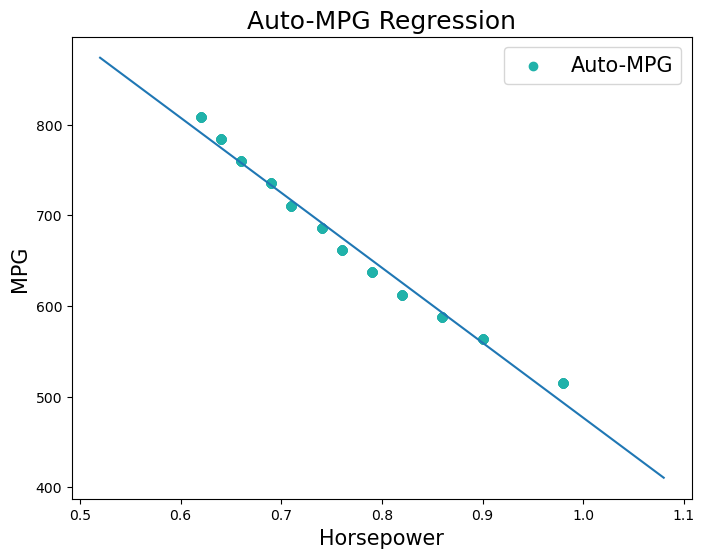

In [157]:
neuron = SingleNeuron(linear_regression_activation, mean_sqaured_error)
neuron.train(X, y, alpha=0.001, epochs=20000)

domain = np.linspace(np.min(X) - .1, np.max(X) + .1, 100)
preds = neuron.predict(domain.reshape(-1, 1))

plt.figure(figsize = (8, 6))
plt.scatter(X, y, color = "lightseagreen", label = "Auto-MPG")
plt.plot(domain, neuron.predict(domain.reshape(-1, 1)))
plt.xlabel("Horsepower", fontsize = 15)
plt.ylabel("MPG", fontsize = 15)
plt.title("Auto-MPG Regression", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()